# AGN Catalog Toolbox (ACT) Encapsulated Testing

This is an example notebook showing the AGN Catalog Toolbox Testing code (written by Chris) in action.

In [1]:
import ACTTestingEncapsulation as actt
import ACTLiterature as actl 

import numpy as np
from matplotlib import pyplot as plt

# Set the redshift of interest here.
redshift = 0.0

The variables we wish to test are listed in arrays for easy repeated access.

In [2]:
# Variations
iterations = 4
dutycycle = ["Man16", "Schulze", 0.1, 0.05]

Next we create the class, and we call the approprate member functions to read in the data, assign the variables we want and then return the plotting data. Much of the best behaviour is encapsulated by the default arguments, so some parameters do not need to be called. Running this section can take some time.

Note that calling the member function to load in the multidark data expects a file in a subfolder '/BigData/' that is named 'MD_<redshift>.npy, in with the columns x, y, z, scale at accretion, mass at accretion, and mvir.

In [3]:
# Create the master class.
obj = actt.AGNCatalog()
obj.set_z(redshift)

# Load in the MultiDark Haloes.
obj.load_dm_catalog()
obj.assign_stellar_mass()
obj.assign_black_hole_mass()

Loading Dark Matter Catalog
Loading Halo Catalogue
Found file: MD_0.093.npy
dtypes found:  [('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('id', '<i8'), ('upid', '<i8'), ('mvir', '<f4'), ('Acc_Scale', '<f4'), ('Macc', '<f4')]
    Sorting list w.r.t. upId
    copying all 114235673 elements with up_id = -1
    sorting remaining list list w.r.t. main id
    copying remaining 16470020 elements
Assigning Stellar Mass
Assigning Black Hole Mass


### Example of catalog cut - reduce volume

In [4]:
limit = 500
flag = (obj.main_catalog['x'] < limit) * (obj.main_catalog['y'] < limit) * (obj.main_catalog['z'] < limit)

obj.main_catalog = obj.main_catalog[flag]
obj.volume = limit**3

In [5]:
# Loop to support variations in parameters
for i in range(iterations):
    obj.assign_duty_cycle(dutycycle[i])
    obj.assign_luminosity()
    obj.assign_obscuration()
    
    obj.get_wp()
    # We then compute the bias
    obj.get_bias()
    obj.get_hod()

Assigning Duty Cycle, using Man16's method
Assigning Luminosity
Assigning Nh
Assigning AGN type


/media/chris/Files/EuclidAGN/AGNCatalogToolbox.py:635: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  type[(nh >= 22) * (nh < 24)] = type2[[(nh >= 22) * (nh < 24)]]


Computing wp


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 31,31,10.  Time taken =   0.191 sec
countpairs_wp_float> gridlink seems inefficient. nmesh = (31, 31, 10); avg_np = 532. Boosting bin refine factor - should lead to better performance
xmin = 0.000000 xmax=500.000000 rpmax = 31.622777
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 47,47,10.  Time taken =   0.212 sec
Using AVX2 kernel
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 36.282 secs


Calculating Bias
Calculating HOD


/media/chris/Files/EuclidAGN/AGNCatalogToolbox.py:855: RuntimeWarning: invalid value encountered in true_divide
  hod[h] = hist_subject[h] / hist_centrals_unweighted[h]


Assigning Duty Cycle, using Schulze's method
Assigning Luminosity
Assigning Nh
Assigning AGN type
Computing wp


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 31,31,10.  Time taken =   0.150 sec
countpairs_wp_float> gridlink seems inefficient. nmesh = (31, 31, 10); avg_np = 532. Boosting bin refine factor - should lead to better performance
xmin = 0.000000 xmax=500.000000 rpmax = 31.622777
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 47,47,10.  Time taken =   0.241 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 36.483 secs


Calculating Bias
Calculating HOD
Assigning Duty Cycle, using 0.1's method
Assigning Luminosity
Assigning Nh
Assigning AGN type
Computing wp


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 31,31,10.  Time taken =   0.150 sec
countpairs_wp_float> gridlink seems inefficient. nmesh = (31, 31, 10); avg_np = 532. Boosting bin refine factor - should lead to better performance
xmin = 0.000000 xmax=500.000000 rpmax = 31.622777
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 47,47,10.  Time taken =   0.222 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.373 secs


Calculating Bias
Calculating HOD
Assigning Duty Cycle, using 0.05's method
Assigning Luminosity
Assigning Nh
Assigning AGN type
Computing wp


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 31,31,10.  Time taken =   0.152 sec
countpairs_wp_float> gridlink seems inefficient. nmesh = (31, 31, 10); avg_np = 532. Boosting bin refine factor - should lead to better performance
xmin = 0.000000 xmax=500.000000 rpmax = 31.622777
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 47,47,10.  Time taken =   0.218 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 36.215 secs


Calculating Bias
Calculating HOD


### XLF

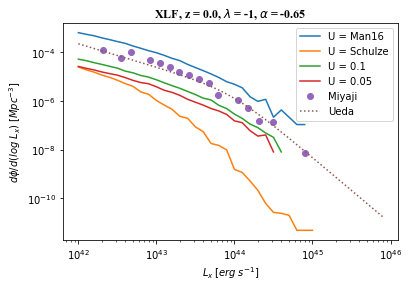

In [6]:
# Plot of the XLF 

plt.figure()

for i in range(iterations):
    plt.plot(10**obj.XLF_plottingData[i].x, 10**obj.XLF_plottingData[i].y, label = r"U = {}".format(dutycycle[i]))
    
    
# XLF Data
XLF = actl.XLFData(redshift)
mXLF_data = XLF.get_miyaji2015()
plt.plot(mXLF_data.x, mXLF_data.y, 'o', label = "Miyaji")

uXLF_data = XLF.get_ueda14(np.arange(42, 46, 0.1))
plt.plot(uXLF_data.x, uXLF_data.y, ':', label = "Ueda")

# Plotting
plt.xlabel(r'$L_x\;[erg\;s^{-1}]$')
plt.ylabel(r'$d\phi /d(log\;L_x)\;[Mpc^{-3}]$')
plt.title(r'XLF, z = {}, $\lambda$ = {}, $\alpha$ = {}'.format(redshift, -1, -0.65), fontname = 'Times New Roman')
plt.loglog()
plt.legend()
plt.show()

### Eddington Ratio Distribution

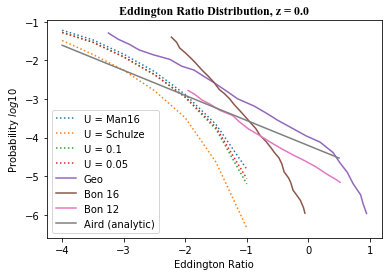

In [7]:
# Plot the Eddington ratio distribution

plt.figure()

for i in range(iterations):
    plt.plot(obj.Edd_plottingData[i].x, obj.Edd_plottingData[i].y, ':', label = r"U = {}".format(dutycycle[i]))

EddData = actl.EddingtonDistributionData(redshift)
plt.plot(EddData.Geo.x, EddData.Geo.y, label = "Geo")
plt.plot(EddData.Bon16.x, EddData.Bon16.y, label = "Bon 16")
plt.plot(EddData.Bon12.x, EddData.Bon12.y, label = "Bon 12")

eddbin = np.arange(-4, 1., 0.5)
probSche = EddData.AirdDist(eddbin)
plt.plot(eddbin, probSche, label = "Aird (analytic)")
plt.title(r'Eddington Ratio Distribution, z = {}'.format(redshift), fontname = 'Times New Roman')
plt.xlabel("Eddington Ratio")
plt.ylabel("Probability $log10$")

plt.legend()

  
plt.show()


### WP

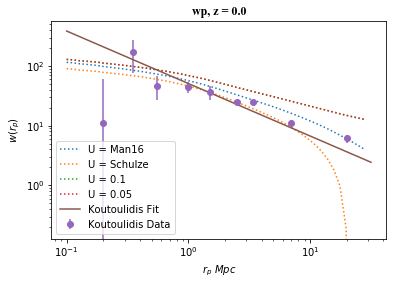

In [8]:
plt.figure()

wp_data = actl.WPData(redshift)

for i in range(iterations):
    plt.plot(obj.WP_plottingData[i].x, obj.WP_plottingData[i].y, ':', label = r"U = {}".format(dutycycle[i]))

plt.errorbar(wp_data.r_Koutoulidis, wp_data.wp_Koutoulidis,\
                yerr = wp_data.wp_Koutoulidis_e, fmt='o', label = "Koutoulidis Data")

plt.plot(obj.wpbins, wp_data.k_power_law(obj.wpbins), label = "Koutoulidis Fit")
plt.title(r'wp, z = {}'.format(redshift), fontname = 'Times New Roman')    
plt.xlabel(r'$r_p$ $Mpc$')
plt.ylabel(r'$w(r_p)$')    

plt.legend()
plt.loglog()
plt.show()


### Bias

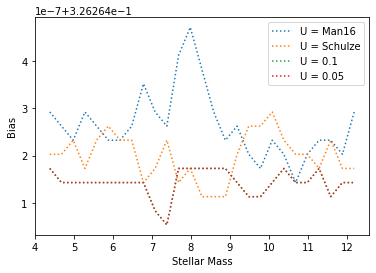

In [9]:
plt.figure()

for i in range(iterations):
    plt.plot(obj.bias_plottingData[i].x, obj.bias_plottingData[i].y, ':', label = r"U = {}".format(dutycycle[i]))
    
plt.xlabel("Stellar Mass")
plt.ylabel("Bias")
plt.legend()
plt.show()

### HOD

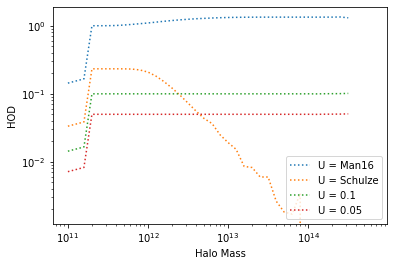

In [10]:
plt.figure()

for i in range(iterations):
    plt.plot(10**obj.HOD_plottingData[i].x, obj.HOD_plottingData[i].y, ':', label = r"U = {}".format(dutycycle[i]))
    
plt.xlabel("Halo Mass")
plt.ylabel("HOD")
plt.loglog()
plt.legend()
plt.show()